<a href="https://colab.research.google.com/github/Proskahn/Car-recognition-with-YOLOv8/blob/main/Object_recognition_with_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9zHrX1gekxBH5fTaY3XJ")
project = rf.workspace("data-labeling-ebzw0").project("car-detection-nzzdy")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to car-detection-2 in yolov8:: 100%|██████████| 48/48 [00:00<00:00, 4746.93it/s]


In [4]:
import numpy as np
import pandas as pd
import cv2 as cv

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 6.4 MB/s eta 0:00:00


In [5]:
!pip install ultralytics
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [6]:
model = YOLO("yolov8m.pt")

In [8]:
from pathlib import Path
with open("/content/car-detection-2/data.yaml") as file:
    yaml_content = file.read()

with Path('data.yaml').open('w') as f:
    f.write(yaml_content)

print(yaml_content)

names:
- car
nc: 1
roboflow:
  license: CC BY 4.0
  project: car-detection-nzzdy
  url: https://universe.roboflow.com/data-labeling-ebzw0/car-detection-nzzdy/dataset/2
  version: 2
  workspace: data-labeling-ebzw0
test: /content/car-detection-2/test/images
train: /content/car-detection-2/train/images
val: /content/car-detection-2/valid/images



In [9]:
# Train the model
model.train(data='/content/car-detection-2/data.yaml', epochs=20, imgsz=640)

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/car-detection-2/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/car-detection-2/train/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/car-detection-2/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.151      3.766      1.656         50        640: 100%|██████████| 1/1 [00:48<00:00, 48.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

                   all          3          9    0.00778      0.778     0.0159    0.00619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.301      3.589      1.795         51        640: 100%|██████████| 1/1 [00:48<00:00, 48.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]

                   all          3          9    0.00889      0.889     0.0962     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.186      3.023      1.658         59        640: 100%|██████████| 1/1 [00:46<00:00, 46.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all          3          9      0.313      0.667       0.32      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      2.141      2.111      1.532         79        640: 100%|██████████| 1/1 [00:47<00:00, 47.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]

                   all          3          9          1      0.434      0.652      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      2.008      1.722      1.601         43        640: 100%|██████████| 1/1 [00:46<00:00, 46.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]

                   all          3          9      0.571      0.778      0.781       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G       1.78      1.398      1.273         82        640: 100%|██████████| 1/1 [00:46<00:00, 46.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]

                   all          3          9      0.748      0.667      0.786      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.527      1.241      1.245         74        640: 100%|██████████| 1/1 [00:47<00:00, 47.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]

                   all          3          9      0.824      0.667        0.8      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.977      1.668      1.424         37        640: 100%|██████████| 1/1 [00:46<00:00, 46.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]

                   all          3          9      0.616      0.778      0.777      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.774      1.728      1.323         54        640: 100%|██████████| 1/1 [00:45<00:00, 45.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]

                   all          3          9      0.554          1      0.792      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.582      1.661      1.231         50        640: 100%|██████████| 1/1 [00:45<00:00, 45.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]

                   all          3          9      0.783          1      0.914      0.412


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.602      1.395      1.339         37        640: 100%|██████████| 1/1 [00:45<00:00, 45.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]

                   all          3          9      0.971          1      0.995      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.513      1.176      1.285         35        640: 100%|██████████| 1/1 [00:45<00:00, 45.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all          3          9      0.793          1      0.935      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G       1.36      0.998      1.166         37        640: 100%|██████████| 1/1 [00:45<00:00, 45.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]

                   all          3          9          1      0.771      0.939      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.432      1.186      1.135         35        640: 100%|██████████| 1/1 [00:44<00:00, 44.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]

                   all          3          9       0.85      0.778      0.862      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.397      1.035      1.219         37        640: 100%|██████████| 1/1 [00:44<00:00, 44.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]

                   all          3          9      0.899       0.99      0.984      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.391     0.9738       1.19         37        640: 100%|██████████| 1/1 [00:44<00:00, 44.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]

                   all          3          9      0.898       0.98      0.984      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.253     0.9063      1.115         36        640: 100%|██████████| 1/1 [00:44<00:00, 44.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]

                   all          3          9      0.888      0.884      0.963      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.265     0.8654      1.167         34        640: 100%|██████████| 1/1 [00:44<00:00, 44.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all          3          9      0.888      0.884      0.963      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.437     0.9877      1.274         36        640: 100%|██████████| 1/1 [00:45<00:00, 45.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]

                   all          3          9      0.814      0.977      0.941      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.268     0.8799      1.121         36        640: 100%|██████████| 1/1 [00:43<00:00, 43.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

                   all          3          9      0.814      0.977      0.941      0.454



20 epochs completed in 0.349 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 52.0MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


                   all          3          9       0.97          1      0.995      0.489
Speed: 1.0ms preprocess, 1159.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79082531c940>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/alincijov/self-driving-cars")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zhuangkang
Your Kaggle Key: ··········


100%|██████████| 892M/892M [00:12<00:00, 76.6MB/s]


In [15]:

results=model.predict(source="/content/car-detection-2/test/images/1478020256192066071_jpg.rf.131cd9d3ed02d069ab1068be5d7eca3b.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/car-detection-2/test/images/1478020256192066071_jpg.rf.131cd9d3ed02d069ab1068be5d7eca3b.jpg: 640x640 2 cars, 1213.8ms
Speed: 9.9ms preprocess, 1213.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train53


In [16]:
result = results[0]
print(result)
box = result.boxes[0]
print(box)

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'car'}
obb: None
orig_img: array([[[180, 222, 251],
        [169, 209, 237],
        [121, 155, 184],
        ...,
        [ 12,  24,  24],
        [ 15,  27,  27],
        [ 17,  29,  29]],

       [[185, 228, 255],
        [165, 205, 233],
        [116, 151, 177],
        ...,
        [ 12,  24,  24],
        [ 14,  26,  26],
        [ 16,  28,  28]],

       [[188, 229, 254],
        [182, 223, 246],
        [144, 178, 202],
        ...,
        [ 15,  24,  27],
        [ 16,  25,  28],
        [ 16,  25,  28]],

       ...,

       [[ 26,  30,  31],
        [ 26,  30,  31],
        [ 26,  30,  31],
        ...,
        [ 22,  26,  27],
        [ 22,  26,  27],
        [ 21,  25,  26]],

       [[ 25,  29,  30],
        [ 26,  30,  31],
        [ 26,  30,  31],
        ...,
        [ 23,  27,  28],
        [ 22,  26,  27],
        [ 22,  2

In [17]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [413.04168701171875, 248.95619201660156, 479.81158447265625, 369.69189453125]
Probability: 0.8760249018669128


In [18]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [413, 249, 480, 370]
Probability: 0.88
---
Object type: car
Coordinates: [100, 287, 155, 344]
Probability: 0.85
---


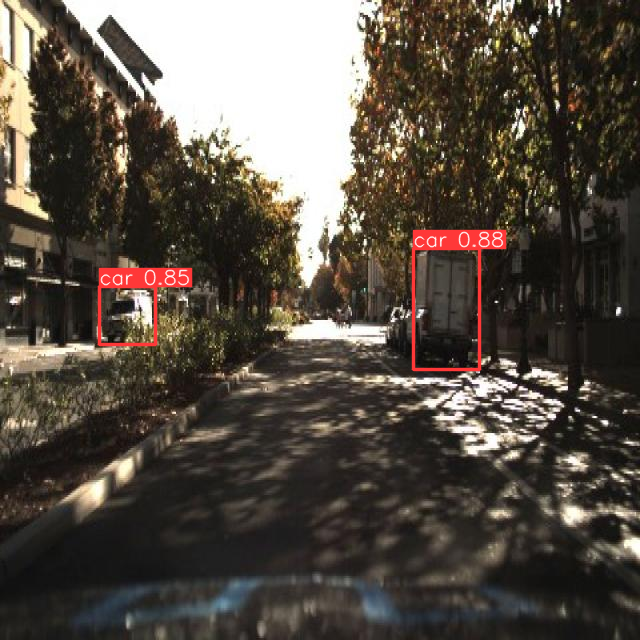

In [19]:
plot = results[0].plot()
plot = cv.cvtColor(plot, cv.COLOR_BGR2RGB)
display(Image.fromarray(plot))